In [1]:
import tensorflow as tf

print(tf.__version__)  # 查看tensorflow版本
print(tf.__path__)     # 查看tensorflow安装路径

a = tf.test.is_built_with_cuda()  # 判断CUDA是否可以用
b = tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)  # 判断GPU是否可以用

print(a) # 显示True表示CUDA可用
print(b) # 显示True表示GPU可用

# 查看驱动名称
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

d:\anaconda\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\anaconda\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\anaconda\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\anaconda\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1)

1.13.1
['d:\\anaconda\\envs\\py36\\lib\\site-packages\\tensorflow_estimator\\python\\estimator\\api', 'd:\\anaconda\\envs\\py36\\lib\\site-packages\\tensorflow', 'd:\\anaconda\\envs\\py36\\lib\\site-packages\\tensorflow\\_api\\v1']
True
True
Default GPU Device: /device:GPU:0


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import metrics
import keras_metrics as km

Using TensorFlow backend.


In [3]:
df = pd.read_csv(r'C:\Users\dawns\Desktop\Master thesis\data\Clearning data for error detection.csv')
df

,Unnamed: 0,Unnamed: 0.1,sentence,location_list,type_list,error_list,contentnew
0,0,0,[BD《]绿色绿色与饥饿[BD》]如果要我在绿色食品与饥饿{CQ中}做出选择的话，我会毫不犹...,"d.t.u.d.c.a.s.t.Sentence(begin=0, end=98)",0,0,《绿色绿色与饥饿》如果要我在绿色食品与饥饿做出选择的话，我会毫不犹豫的选择饥饿，大家也应该在...
1,1,1,是的[BQ，]虽然科技在发展，人们的需求也越来越多，但是我认为，与其将时间浪费在减少生产量来...,"d.t.u.d.c.a.s.t.Sentence(begin=98, end=178)",0,0,是的虽然科技在发展，人们的需求也越来越多，但是我认为，与其将时间浪费在减少生产量来制造绿色食...
2,2,2,“少而精”，这正是绿色食品的特点，也是那些“吃饱撑着”的人的观点。,"d.t.u.d.c.a.s.t.Sentence(begin=178, end=211)",0,0,“少而精”，这正是绿色食品的特点，也是那些“吃饱撑着”的人的观点。
3,3,3,现在普遍饮用的并不定绿色食品，而是短文里所说的所谓“吃了会有害于人体健康”的食品。,"d.t.u.d.c.a.s.t.Sentence(begin=211, end=252)",0,0,现在普遍饮用的并不定绿色食品，而是短文里所说的所谓“吃了会有害于人体健康”的食品。
4,4,4,但是，究竟有多少人是因为吃了这些食品而死亡（生病）的呢？,"d.t.u.d.c.a.s.t.Sentence(begin=252, end=280)",0,0,但是，究竟有多少人是因为吃了这些食品而死亡（生病）的呢？
...,...,...,...,...,...,...,...
25957,25957,25957,对于我来说[F説][BQ，]学习汉语的苦[B告]是经历人为的障碍[F礙]，而不像其他的外国人...,"d.t.u.d.c.a.s.t.Sentence(begin=455, end=531)",0,0,对于我来说学习汉语的告是经历人为的障碍，而不像其他的外国人因不是他们的母语而遇到了语语转换的困难。
25958,25958,25958,学习汉语的乐处可真多。,"d.t.u.d.c.a.s.t.Sentence(begin=531, end=542)",0,0,学习汉语的乐处可真多。
25959,25959,25959,在看国语电影时[F時]，能了解电影剧情和对白而不需靠字幕和翻译。,"d.t.u.d.c.a.s.t.Sentence(begin=542, end=574)",0,0,在看国语电影时，能了解电影剧情和对白而不需靠字幕和翻译。
25960,25960,25960,和别人以汉语来交谈的亲切感等等。,"d.t.u.d.c.a.s.t.Sentence(begin=574, end=590)",0,0,和别人以汉语来交谈的亲切感等等。


In [4]:
#df =df.head(100).copy()
#df

In [5]:
import os
# 是否使用GPU训练
os.environ["CUDA_VISIBLE_DEVICES"] = "4,5,6,7,8"

In [6]:
count = df.loc[:, 'type_list'].value_counts()
count
print(count)

0    23537
1     2425
Name: type_list, dtype: int64


In [7]:
x_train, x_test, y_train, y_test = train_test_split(df['sentence'], df['type_list'], test_size=0.2)


In [8]:
# train test set build
train_df = pd.DataFrame({'label': y_train, 'text': x_train})
test_df = pd.DataFrame({'label': y_test, 'text': x_test})
print(train_df.head())
print(test_df.head())
train_df['text_len'] = train_df['text'].apply(lambda x: len(x))
print(train_df.describe())

       label                                               text
9868       0                                   这期间我一直在语言学院学习汉语。
17872      0                                           多多关照一下吧!
4959       0                       从中{CC从此}我们可以看出少食[BD，]对人健康有利。
10891      1  或者做每一件事之前，想一想怎样[F樣]做这[F這]件事才不会失败呢，{CD又}或者当这[F這...
6275       0                                所以用天然肥的人、买绿色食品的人很少。
       label                                               text
16277      0                       我觉得一个人得了不可治疗的病给很多周围人带来极大的痛苦。
2552       0  而且每个人们都很想在这世界上活着享受现代化的文明，所以当然吃的东西也很讲究，我妈妈也是以前买...
14575      1  因为[F為]我的先生只{CC1只要}想利用{CJ-dy这段}时[F時]间{CD去}多休息,所...
11062      1                   比如{CC假如}，我考过进入大学的考试，但我没有考{CD得}上。
4722       0  问题在于{CC2在}化肥的使用方式[BQ，]不要过多地{CC的}使用它，而{CJ-zy要}适...
              label      text_len
count  20769.000000  20769.000000
mean       0.093505     37.044875
std        0.291145     28.407990
min        0.000000      2.000000
25%        0.000000     19.000000
50%        0.000000     30.0

In [9]:
#训练数据集文本长度百分之75分位点为46，所以padding 取46（先用 100 试一试）

In [10]:
import numpy as np
from keras.utils import to_categorical
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Input, BatchNormalization, Dense
from bert.extract_feature import BertVector

In [11]:
# 读取文件并进行转换
bert_model = BertVector(pooling_strategy="REDUCE_MEAN", max_seq_len=46)
print('begin encoding')
f = lambda text: bert_model.encode([text])["encodes"][0]
train_df['x'] = train_df['text'].apply(f)
test_df['x'] = test_df['text'].apply(f)
print('end encoding')

x_train = np.array([vec for vec in train_df['x']])
x_test = np.array([vec for vec in test_df['x']])
y_train = np.array([vec for vec in train_df['label']])
y_test = np.array([vec for vec in test_df['label']])
print('x_train: ', x_train.shape)

# Convert class vectors to binary class matrices.
num_classes = 2
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


I:BERT_VEC:[graph:opt: 48]:model config: e:\All codes\Master code\ERROR detection bert\chinese_L-12_H-768_A-12\bert_config.json
I:BERT_VEC:[graph:opt: 54]:build graph...



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



I:BERT_VEC:[graph:opt:128]:load parameters from checkpoint...
I:BERT_VEC:[graph:opt:130]:freeze...
I:BERT_VEC:[graph:opt:133]:optimize...
I:BERT_VEC:[graph:opt:144]:write graph to a tmp file: ./tmp_graph11


begin encoding
end encoding
x_train:  (20769, 768)


In [12]:

#print(type(x_train))
#print('y_train: ', y_train.shape)
#print(type(y_train))
#print('x_test: ', x_test.shape)
#print(type(x_test))
#print('y_test: ', y_test.shape)
#print(type(y_test))       

In [13]:
# 这一步保存所有通过Bert提取的向量，后续直接加载避免重复工作
np.save('x_train.npy',x_train)
np.save('y_train.npy',y_train)
np.save('x_test.npy',x_test)
np.save('y_test.npy',y_test)   

In [14]:
a = np.load('x_train.npy')
b = np.load('y_train.npy')
c = np.load('x_test.npy')
d = np.load('y_test.npy')

In [15]:
from tensorflow import keras
import keras_metrics as km
# 创建DNN模型
x_in = Input(shape=(768, ))
x_out = Dense(32, activation="relu")(x_in)
x_out = BatchNormalization()(x_out)
x_out = Dense(num_classes, activation="sigmoid")(x_out)
model = Model(inputs=x_in, outputs=x_out)
print(model.summary())
     
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=[km.f1_score(), km.binary_precision(), km.binary_recall()])    #km.f1_score()

# 模型训练、评估以及保存
history = model.fit(x_train, y_train, batch_size=100, epochs=20)
model.save('Bert_DNN(2).h5')
#print(model.evaluate(x_test, y_test))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 768)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                24608     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 24,802
Trainable params: 24,738
Non-trainable params: 64
_________________________________________________________________
None
tracking <tf.Variable 'Variable:0' shape=() dtype=int32> tp
tracking <tf.Variable 'Variable_1:0' shape=() dtype=int32> fp
tracking <tf.Variable 'Variable_2:0' shape=() dtype=int32> tp
tracking <tf.Variable 'Variable_3:0' shape=() dtype=int32> fn
t

In [16]:
print(model.evaluate(x_test, y_test))

5193/5193 [==============================] - 1s 179us/step
[0.23988026891878614, 0.9434397220611572, 0.9490828514099121, 0.937951385974884]


In [17]:
# 计算y——pred并计算打印最大概率对应的标签
import numpy as np
y_pred= model.predict(x_test)
print(y_pred)
Predicted=np.argmax(y_pred, axis=1)
len(Predicted)
type(Predicted)



[[9.9888551e-01 6.8011880e-04]
 [9.9529380e-01 3.8178563e-03]
 [3.2152152e-01 6.2408853e-01]
 ...
 [2.6602587e-01 6.6998321e-01]
 [2.9663730e-01 7.1588254e-01]
 [9.9999225e-01 8.8837151e-06]]


numpy.ndarray

In [18]:
#计算 y—test 最大概率对应的标签
print(y_test)
Tested =  np.argmax(y_test, 1)
print(Tested)
print(len(Tested),type(Tested))

[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[0 0 1 ... 0 0 0]
5193 <class 'numpy.ndarray'>


In [19]:
# y_pred 和 y——test 转为numpy 并画出 confusion matrix
from sklearn.metrics import classification_report
print(classification_report(Tested, Predicted))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4710
           1       0.50      0.54      0.51       483

    accuracy                           0.91      5193
   macro avg       0.72      0.74      0.73      5193
weighted avg       0.91      0.91      0.91      5193



Text(0.5, 24.0, 'Predicted label')

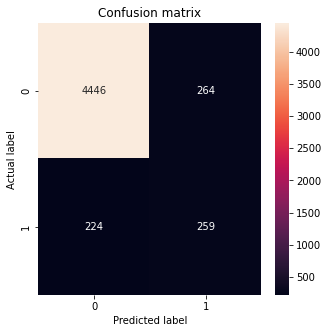

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Tested, Predicted)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')